<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°05





**Objetivo**: Explorar y visualizar datos de Netflix usando **matplotlib** y **seaborn/plotly**, aprendiendo a elegir gráficos adecuados para distintos tipos de variables y preguntas de análisis.



**Dataset**:

Trabajaremos con el archivo `netflix_titles.csv`, que contiene información sobre los títulos disponibles en la plataforma Netflix hasta el año 2021.

| Variable       | Clase     | Descripción                                                                 |
|----------------|-----------|------------------------------------------------------------------------------|
| show_id        | caracter  | Identificador único del título en el catálogo de Netflix.                   |
| type           | caracter  | Tipo de contenido: 'Movie' o 'TV Show'.                                     |
| title          | caracter  | Título del contenido.                                                       |
| director       | caracter  | Nombre del director (puede ser nulo).                                       |
| cast           | caracter  | Lista de actores principales (puede ser nulo).                              |
| country        | caracter  | País o países donde se produjo el contenido.                                |
| date_added     | fecha     | Fecha en la que el título fue agregado al catálogo de Netflix.              |
| release_year   | entero    | Año de lanzamiento original del título.                                     |
| rating         | caracter  | Clasificación por edad (por ejemplo: 'PG-13', 'TV-MA').                      |
| duration       | caracter  | Duración del contenido (minutos o número de temporadas para series).        |
| listed_in      | caracter  | Categorías o géneros en los que está clasificado el contenido.              |
| description    | caracter  | Breve sinopsis del contenido.                                               |




In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

In [4]:
# Cargar datos
df = pd.read_csv('https://raw.githubusercontent.com/fralfaro/MAT281/main/docs/labs/data/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 📊 Parte 1: Exploración visual básica

1. **Distribución de tipos de contenido**

   * Realiza un gráfico de barras mostrando la cantidad de películas vs series (`type`).
   * Pregunta guía: ¿Cuál es el tipo de contenido predominante en Netflix? ¿Qué implicancias podría tener para los usuarios?

2. **Histograma de años de lanzamiento**

   * Muestra cómo se distribuyen los títulos según su `release_year`.
   * Pregunta guía: ¿Hay más contenido reciente o antiguo? ¿Notas algún patrón en décadas específicas?

3. **Proporción de clasificaciones por edad (`rating`)**

   * Haz un gráfico circular o de barras.
   * Pregunta guía: ¿Qué clasificación es más común? ¿Crees que Netflix está más enfocado en público adulto, familiar o infantil?



/tmp/ipython-input-658563644.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_tipo.index, y=conteo_tipo.values, palette="Set2")


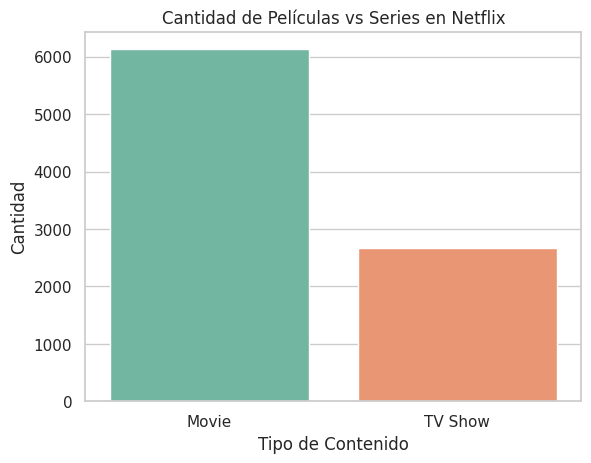

In [5]:
conteo_tipo = df['type'].value_counts()

sns.barplot(x=conteo_tipo.index, y=conteo_tipo.values, palette="Set2")
plt.title("Cantidad de Películas vs Series en Netflix")
plt.xlabel("Tipo de Contenido")
plt.ylabel("Cantidad")
plt.show()

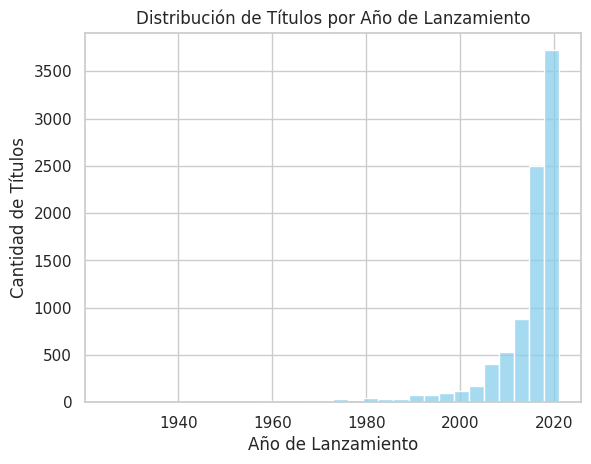

In [6]:
sns.histplot(df['release_year'], bins=30, kde=False, color="skyblue")
plt.title("Distribución de Títulos por Año de Lanzamiento")
plt.xlabel("Año de Lanzamiento")
plt.ylabel("Cantidad de Títulos")
plt.show()

/tmp/ipython-input-632978370.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_rating.index, y=conteo_rating.values, palette="pastel")


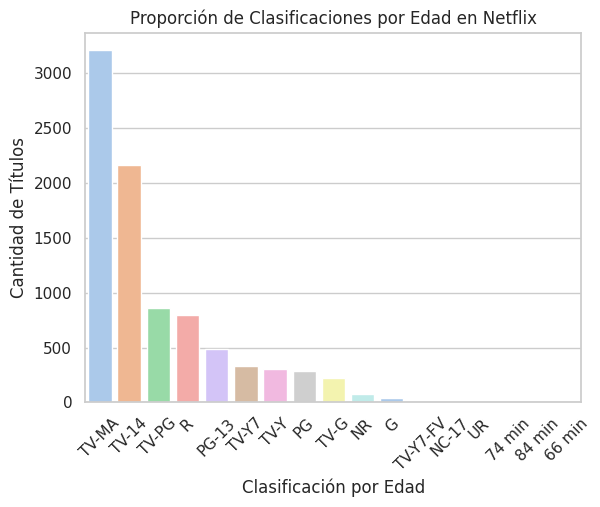

In [15]:
conteo_rating = df['rating'].value_counts()

sns.barplot(x=conteo_rating.index, y=conteo_rating.values, palette="pastel")
plt.title("Proporción de Clasificaciones por Edad en Netflix")
plt.xlabel("Clasificación por Edad")
plt.ylabel("Cantidad de Títulos")
plt.xticks(rotation=45)
plt.show()



## 🎨 Parte 2: Tendencias y evolución en el tiempo

4. **Número de títulos agregados por año**

   * Usa `date_added` (convertido a fecha) y grafica una serie temporal.
   * Pregunta guía: ¿Cuándo creció más el catálogo de Netflix? ¿Qué relación podría tener con la expansión internacional de la plataforma?

5. **Heatmap de lanzamientos por año y mes**

   * Construye un mapa de calor con `year_added` y `month_added`.
   * Pregunta guía: ¿Hay meses con más estrenos que otros? ¿Qué conclusiones puedes sacar sobre la estacionalidad de lanzamientos?

6. **Duración de películas por género**

   * Extrae la duración en minutos y crea un boxplot agrupado por género principal.
   * Pregunta guía: ¿Qué géneros suelen durar más? ¿Qué podrías decir sobre la variabilidad dentro de un mismo género?


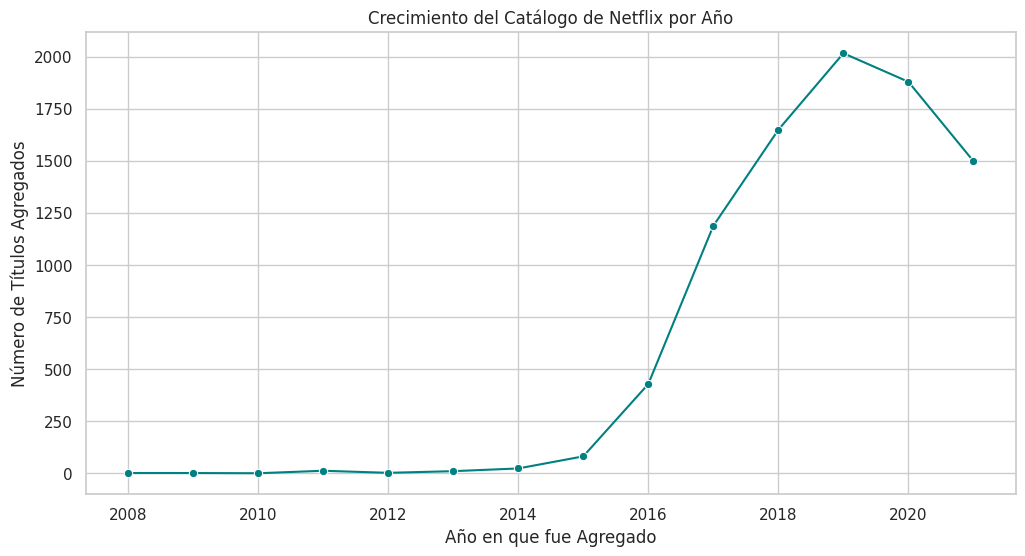

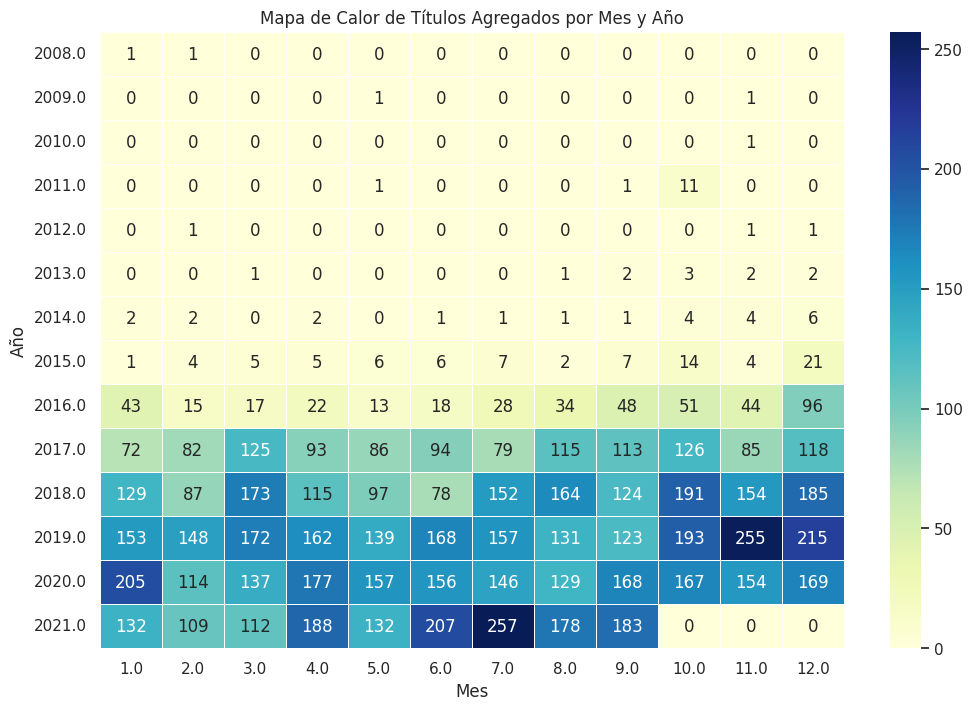

/tmp/ipython-input-3086039292.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_genres, x='duration_min', y='main_genre', palette='Set2', order=top_genres)


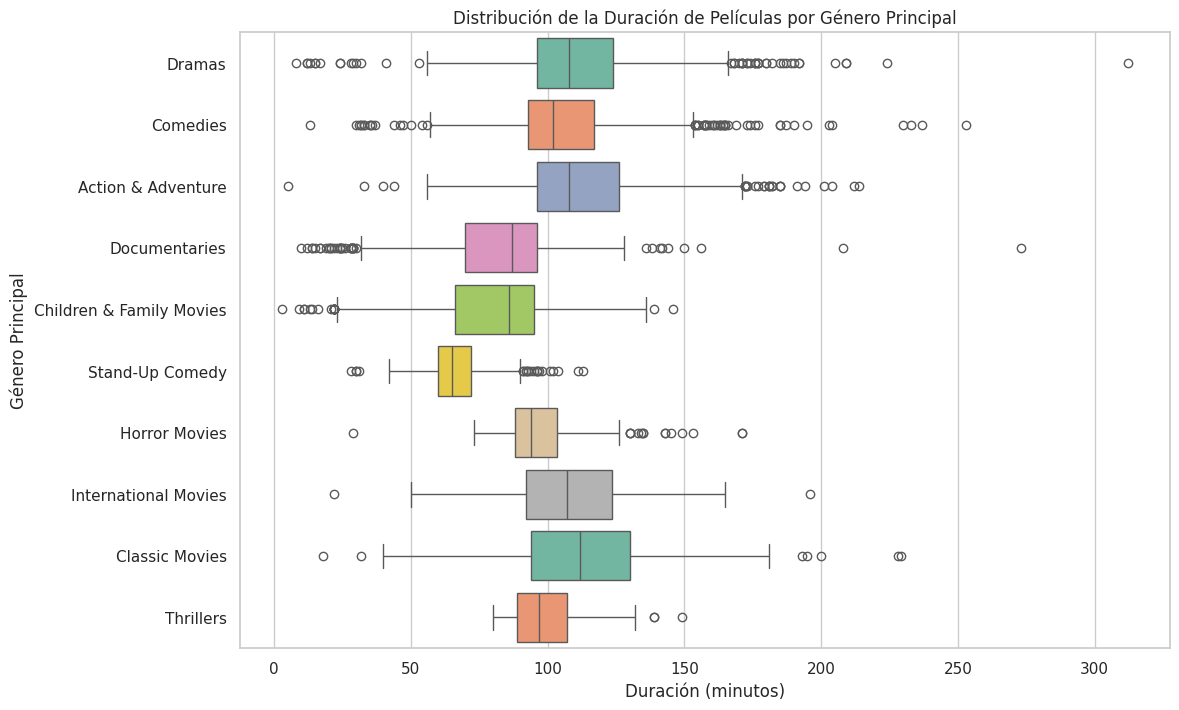

In [29]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# 4.
titles_per_year = df['year_added'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x=titles_per_year.index, y=titles_per_year.values, marker='o', color='teal')
plt.title('Crecimiento del Catálogo de Netflix por Año')
plt.xlabel('Año en que fue Agregado')
plt.ylabel('Número de Títulos Agregados')
plt.grid(True)
plt.show()

# 5.
monthly_releases = df.groupby('year_added')['month_added'].value_counts().unstack().fillna(0)
plt.figure(figsize=(12, 8))
sns.heatmap(monthly_releases, cmap='YlGnBu', annot=True, fmt=".0f", linewidths=.5)
plt.title('Mapa de Calor de Títulos Agregados por Mes y Año')
plt.xlabel('Mes')
plt.ylabel('Año')
plt.show()

# 6.
df_movies = df[df['type'] == 'Movie'].copy()
df_movies.dropna(subset=['duration'], inplace=True)
df_movies['duration_min'] = df_movies['duration'].str.replace(' min', '').astype(int)
df_movies['main_genre'] = df_movies['listed_in'].apply(lambda x: x.split(',')[0])

top_genres = df_movies['main_genre'].value_counts().nlargest(10).index
df_top_genres = df_movies[df_movies['main_genre'].isin(top_genres)]

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_top_genres, x='duration_min', y='main_genre', palette='Set2', order=top_genres)
plt.title('Distribución de la Duración de Películas por Género Principal')
plt.xlabel('Duración (minutos)')
plt.ylabel('Género Principal')
plt.show()



## 🔥 Parte 3: Comparaciones y relaciones

7. **Top 10 países con más producciones**

   * Usa un gráfico de barras para mostrar los países más frecuentes en la columna `country`.
   * Pregunta guía: ¿Qué países dominan el catálogo? ¿Sorprende la distribución o es esperada?

8. **Películas vs Series según género**

   * Realiza un gráfico de barras apiladas para mostrar la cantidad de títulos por género, separando `Movie` y `TV Show`.
   * Pregunta guía: ¿Existen géneros más asociados a películas o a series?

9. **Relación entre duración y año de lanzamiento**

   * Haz un gráfico de dispersión (scatterplot) con `release_year` en el eje X y `duration` (en minutos) en el eje Y.
   * Pregunta guía: ¿Han cambiado los estándares de duración de las películas con el tiempo? ¿Se ven outliers interesantes?



/tmp/ipython-input-2742133133.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_paises.values, y=top_paises.index, palette="viridis")


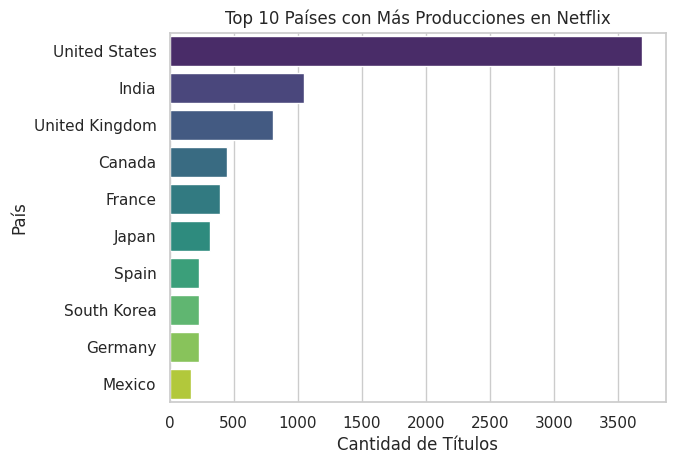

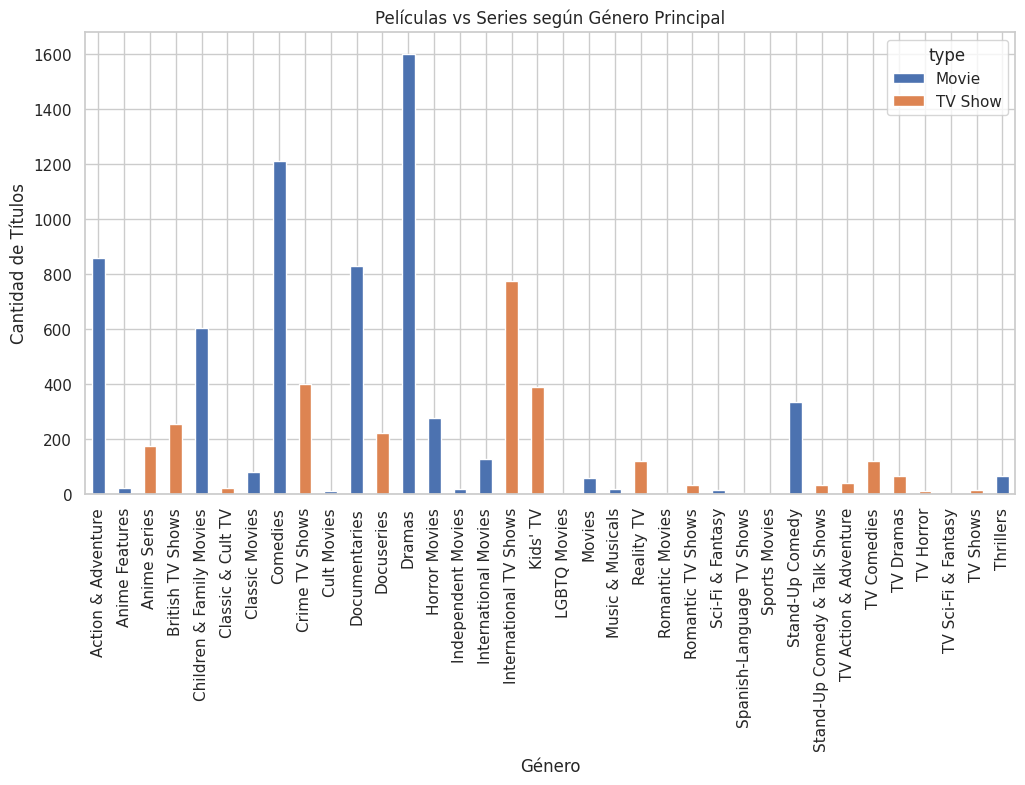

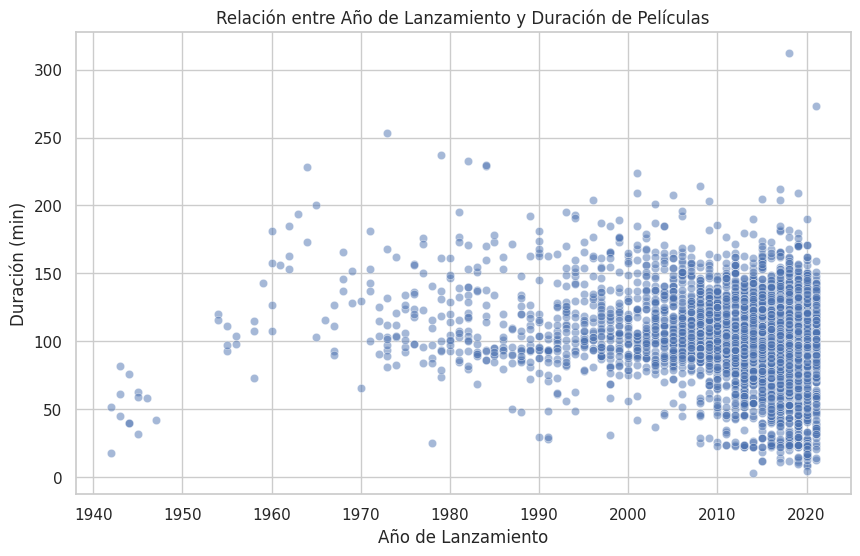

In [28]:
#7.
paises = df['country'].dropna().str.split(", ").explode()

top_paises = paises.value_counts().head(10)

sns.barplot(x=top_paises.values, y=top_paises.index, palette="viridis")
plt.title("Top 10 Países con Más Producciones en Netflix")
plt.xlabel("Cantidad de Títulos")
plt.ylabel("País")
plt.show()

#8.
df['main_genre'] = df['listed_in'].str.split(",").str[0]

tabla_generos = df.groupby(['main_genre','type']).size().unstack(fill_value=0)

tabla_generos.plot(kind="bar", stacked=True, figsize=(12,6))
plt.title("Películas vs Series según Género Principal")
plt.xlabel("Género")
plt.ylabel("Cantidad de Títulos")
plt.xticks(rotation=90)
plt.show()

#9.
peliculas = df[df['type'] == 'Movie'].copy()
peliculas['duration_min'] = peliculas['duration'].str.replace(" min","", regex=False).astype(float)

plt.figure(figsize=(10,6))
sns.scatterplot(data=peliculas, x="release_year", y="duration_min", alpha=0.5)
plt.title("Relación entre Año de Lanzamiento y Duración de Películas")
plt.xlabel("Año de Lanzamiento")
plt.ylabel("Duración (min)")
plt.show()


## ⭐ Desafío Final

* Encuentra las combinaciones más frecuentes de **género + rating** y represéntalas en un **heatmap o gráfico de burbujas**.
* Pregunta guía: ¿Qué géneros están más dirigidos a un público adulto? ¿Y cuáles a público familiar o infantil?

# FIXME